In [4]:

#%pip install plotly kaleido


In [5]:

import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

import plotly.express as px 
import plotly.graph_objects as go 


<br>

**Difference:**

* **plotly.express (px)** → **High-level**, quick, simple. One line charts.
  *Example:* `px.line(df, x, y)`

* **plotly.graph_objects (go)** → **Low-level**, full control, more customization.
  *Example:* `go.Figure(data=[go.Scatter(...)])`

<br>

In [6]:


names = ["yasin","arafat","yasin's wife"]
height = [5.8,6.1,5.4]


fig = px.line(x=names,y=height,title="Height of people")
fig.show()


# save the file in png format:
fig.write_image("ploly.png")

# save the image as html file:
fig.write_html("barplot.html")


<br>
<br>


# `#Draw plot on titanic Dataset:`

<br>
<br>

In [7]:

# import dataset 
df = sns.load_dataset("titanic")
df.dropna(inplace=True)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [8]:

# scatter plot:
fig = px.scatter(data_frame=df,x="age",y="fare",
                color="sex",
                size="fare", # base on fare value 
                title="Scatter plot between Age vs Fare")
fig.show()
fig.write_image("scatter.png") # if we zoom this our image will be broken
fig.write_image("scatter_scale.png",scale=3) # better zooming control


<br>
<br>

# `#02: Plotly with go object:`

<br>
<br>

In [9]:

import plotly.graph_objects as go 

fig = go.Figure(data=go.Scatter(x=[1,2,3,4],y=[10,11,12,13]))
fig.show()



In [10]:

# customize the previous plot:
fig.update_layout(
    title="Simple line chart",
    xaxis=dict(title="Numbers"),
    yaxis=dict(title="Values"),
    showlegend=True 
)

In [11]:

#simple line chart,
fig = go.Figure(data=go.Scatter(x=df['age'],y=df["fare"]))
fig.show()

In [12]:

# corr
df[['age','fare']].corr()


,age,fare
age,1.00000,-0.09073
fare,-0.09073,1.00000


In [13]:

# heatmap:
fig = px.imshow(df[['age','fare']].corr())
fig.show()

<br>
<br>

# `#03: irish dataset:`

<br>
<br>

In [14]:

iris = sns.load_dataset('iris')
iris.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:

iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:

fig = px.imshow(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr())
fig.show()

<br>
<br>


# `#04: 15 plots:`

<br>
<br>


## 01: scatter plot:


In [17]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:

fig1 = px.scatter(data_frame=iris,x="sepal_length",y="sepal_width",color="species",size="sepal_width")
fig1.show()



## 02: line plot:

In [19]:

fig2 = px.line(data_frame=iris,x="sepal_length",y="sepal_width",color="species")
fig2.show()

In [20]:

# if we sort the value then we can get trend:
df_line = iris.sort_values(by=["sepal_length"])
fig2 = px.line(data_frame=df_line,x="sepal_length",y="sepal_width",color="species")
fig2.show()


## 3. Bar plot:

In [21]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:

# but this is not the actual bar plot what we seen in seaborn
fig3 = px.bar(data_frame=iris,x='species',y='sepal_width')
fig3.show()


In [23]:

df_bar = iris.groupby(by=['species']).mean().reset_index()
df_bar


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [24]:

# but where is standard error: 
fig3 = px.bar(data_frame=df_bar,x='species',y='sepal_width')
fig3.show()

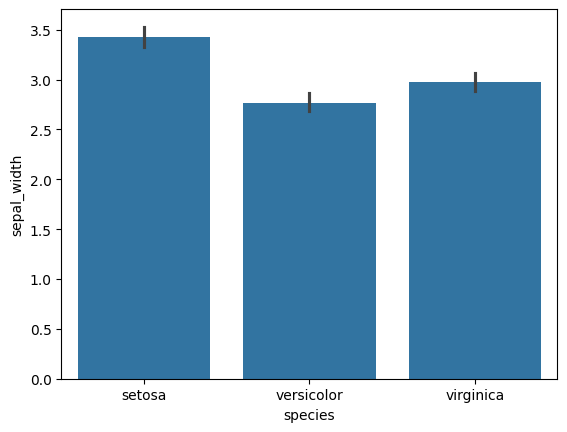

In [25]:


# let's see the bar plot in seaborn:
sns.barplot(data=iris,x="species",y="sepal_width")
plt.show()


## 04. box plot

In [26]:

fig4 = px.box(data_frame=iris,x="species",y="sepal_width",color='species')
fig4.show()


## 05: voilon plot

In [27]:

# voilin + box plot
fig5 = px.violin(data_frame=iris,x="species",y="sepal_width",box=True)
fig5.show()


## 06: Histrogram
 

In [28]:

fig6 = px.histogram(data_frame=iris,x="sepal_width",color='species')
fig6.show()


## 07: pie chart

In [29]:

iris['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [30]:

df_pie = iris['species'].value_counts().reset_index()
df_pie.columns = ['species','count']
df_pie

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


In [31]:

fig7 = px.pie(data_frame=df_pie,values='count',names='species')
fig7.show()

## 08: 3D scatter plot

In [32]:

fig8 = px.scatter_3d(data_frame=iris,x="sepal_width",y="sepal_length",z="petal_width",color="species")
fig8.show()

fig8.write_html("scatter_3d.html")

## 09: area plot

In [33]:

fig9 = px.area(data_frame=iris,x="sepal_width",y="sepal_length",color="species")
fig9.show()


## 10: bubble chart


In [34]:

# basically is a scatter plot with size: 
fig10 = px.scatter(data_frame=iris,x="sepal_length",y="sepal_width",color="species",size="petal_width")
fig10.show()



## 11. Sunburst plot: 

**Basically, for categorical data**

In [35]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:

df_sunburst = iris.groupby(['species','sepal_width']).size().reset_index(name="counts")
df_sunburst

,species,sepal_width,counts
0,setosa,2.3,1
1,setosa,2.9,1
2,setosa,3.0,6
3,setosa,3.1,4
4,setosa,3.2,5
5,setosa,3.3,2
6,setosa,3.4,9
7,setosa,3.5,6
8,setosa,3.6,3
9,setosa,3.7,3


In [37]:

# best for categorical data visulization:
# species ---> parent 
# child ---> sepal_width
fig11 = px.sunburst(data_frame=df_sunburst,path=['species','sepal_width'],values="counts")
fig11.show()




## 12: parallel coordinates plot:


In [38]:

# for this plot we need to convert species into number:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:

iris["species_num"] = iris['species'].astype('category').cat.codes
iris.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
101,5.8,2.7,5.1,1.9,virginica,2
53,5.5,2.3,4.0,1.3,versicolor,1
122,7.7,2.8,6.7,2.0,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,1
35,5.0,3.2,1.2,0.2,setosa,0


In [40]:

fig12 = px.parallel_coordinates(data_frame=iris,color='species_num')
fig12.show()



## 13: Density Contour Plot:


In [ ]:


fig13 = px.density_contour(data_frame=iris,x='sepal_length',y='sepal_width',color="species")
fig13.show()



## 14: Scatter Ternary Plot


In [44]:

fig14 = px.scatter_ternary(data_frame=iris,a='sepal_length',b='sepal_width',c='petal_length',
                           color="species")
fig14.show()



## 15: polar chart



In [45]:

df_polar = iris.groupby(['species']).mean().reset_index()
fig15 = px.line_polar(df_polar,r="sepal_length",theta='species',line_close=True)
fig15.show()
